In [3]:
import pandas as pd
from src import aact_data_prep

In [4]:
from src import aact_viz

# Prep data

In [5]:
metadata_file = 'data/raw_aact/combined_neuro_designs_calculated_full_v2_20240701.csv'
ner_annotations_file = 'data/annotated_aact/ner_outputs/aggregated_ner_annotations_basic_dict_mapped_19632.csv'
enrollment_file = 'data/raw_aact/studies_enrollment_20240717.csv'

output_files = ["data/cleaned_aact/all_metadata_filtered.csv",
        "data/cleaned_aact/general_metadata.csv",
        "data/cleaned_aact/trial_design_metadata.csv",
        "data/cleaned_aact/trial_results_reporting_metadata.csv",
        "data/cleaned_aact/trial_sponsorship_metadata.csv",
        "data/cleaned_aact/trial_enrollment_metadata.csv"]


In [7]:
data_filters = {'phase':'Phase 3'}
data_out_path = 'data/cleaned_aact/'
suffix = '_phase3'
output_files = [
    f"{data_out_path}all_metadata_filtered{suffix}.csv",
    f"{data_out_path}general_metadata{suffix}.csv",
    f"{data_out_path}trial_design_metadata{suffix}.csv",
    f"{data_out_path}trial_results_reporting_metadata{suffix}.csv",
    f"{data_out_path}trial_sponsorship_metadata{suffix}.csv",
    f"{data_out_path}trial_enrollment_metadata{suffix}.csv"
]


In [9]:
aact_data_prep.main_process_raw_input_files(metadata_file, ner_annotations_file, enrollment_file, output_files, data_filters=data_filters)

/Users/sdoneva/Documents/Work/In Progress/PhD/PhD Projects/In Progress/NeuroTrialAnalysis/src/aact_data_prep.py:52: DtypeWarning: Columns (2,7,8,18) have mixed types. Specify dtype option on import or set low_memory=False.
  trial_metadata = pd.read_csv(metadata_file)


Size trial ner_annotations:  9259681
Size trial metada all before filter:  9259681
Size trial metadata all after filter:  6230261
Unique NCTIDs saved:  3563
Size trial_metadata:  3344
Size trial_design:  12374
Size df_results_reported:  3344
Size df_funding:  5167
Size trials_with_participants:  3344


In [10]:
data_filters = {'phase':'Phase 2'}
data_out_path = 'data/cleaned_aact/'
suffix = '_phase2'
output_files = [
    f"{data_out_path}all_metadata_filtered{suffix}.csv",
    f"{data_out_path}general_metadata{suffix}.csv",
    f"{data_out_path}trial_design_metadata{suffix}.csv",
    f"{data_out_path}trial_results_reporting_metadata{suffix}.csv",
    f"{data_out_path}trial_sponsorship_metadata{suffix}.csv",
    f"{data_out_path}trial_enrollment_metadata{suffix}.csv"
]

In [11]:
aact_data_prep.main_process_raw_input_files(metadata_file, ner_annotations_file, enrollment_file, output_files, data_filters=data_filters)

/Users/sdoneva/Documents/Work/In Progress/PhD/PhD Projects/In Progress/NeuroTrialAnalysis/src/aact_data_prep.py:52: DtypeWarning: Columns (2,7,8,18) have mixed types. Specify dtype option on import or set low_memory=False.
  trial_metadata = pd.read_csv(metadata_file)


Size trial ner_annotations:  9259681
Size trial metada all before filter:  9259681
Size trial metadata all after filter:  905863
Unique NCTIDs saved:  4673
Size trial_metadata:  4378
Size trial_design:  7620
Size df_results_reported:  4378
Size df_funding:  7196
Size trials_with_participants:  4378


# Phase 2

In [7]:
data_out_path = 'data/cleaned_aact/'

In [37]:
suffix = '_phase2'
viz_path = 'viz/phase2_trials'
general_metadata = pd.read_csv(f"{data_out_path}general_metadata{suffix}.csv")
trial_design_metadata = pd.read_csv(f"{data_out_path}trial_design_metadata{suffix}.csv")
trial_enrollment_metadata = pd.read_csv(f"{data_out_path}trial_enrollment_metadata{suffix}.csv")
trial_results_reporting_metadata = pd.read_csv(f"{data_out_path}trial_results_reporting_metadata{suffix}.csv")
trial_sponsorship_metadata = pd.read_csv(f"{data_out_path}trial_sponsorship_metadata{suffix}.csv")

In [75]:
trial_sponsorship_metadata

,nct_id,start_year,agency_class,lead_or_collaborator,sponsor_name,phase
0,NCT00006349,2001.0,OTHER,lead,Alliance for Clinical Trials in Oncology,Phase 3
1,NCT00006349,2001.0,NIH,collaborator,National Cancer Institute (NCI),Phase 3
2,NCT00007189,2001.0,OTHER,lead,Seattle Institute for Biomedical and Clinical ...,Phase 3
3,NCT00007189,2001.0,NIH,collaborator,National Institute on Aging (NIA),Phase 3
4,NCT00007189,2001.0,FED,collaborator,VA Puget Sound Health Care System,Phase 3
...,...,...,...,...,...,...
5162,NCT06153004,2023.0,OTHER,collaborator,Sangath,Phase 3
5163,NCT06189027,2018.0,UNIVERSITY,lead,University of Southern California,Phase 3
5164,NCT06189027,2018.0,OTHER,collaborator,Multidisciplinary Association for Psychedelic ...,Phase 3
5165,NCT06211478,2023.0,UNIVERSITY,lead,Ain Shams University,Phase 3


In [11]:
len(general_metadata['nct_id'].unique())

4378

In [35]:
len(trial_design_metadata['nct_id'].unique()), len(general_metadata['nct_id'].unique()), len(trial_enrollment_metadata['nct_id'].unique()), len(trial_results_reporting_metadata['nct_id'].unique()),  len(trial_sponsorship_metadata['nct_id'].unique())

(4378, 4378, 4378, 4378, 4378)

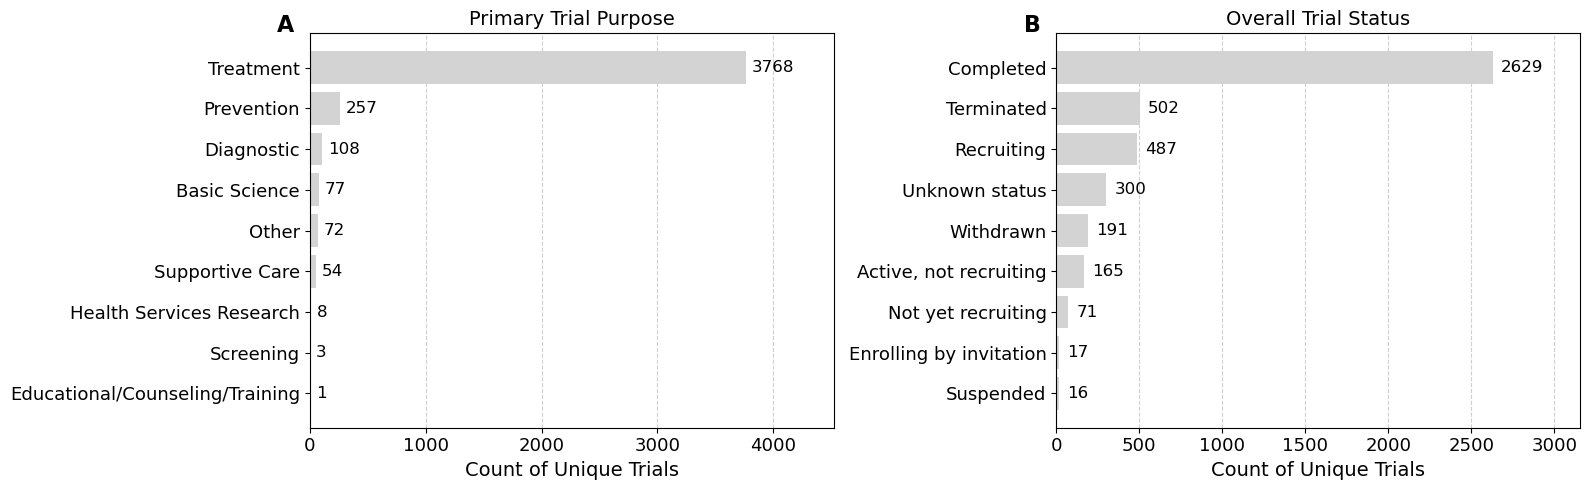

In [41]:
aact_viz.viz_purpose_status(general_metadata, f"{viz_path}/trials_purpose_and_status{suffix}.pdf")

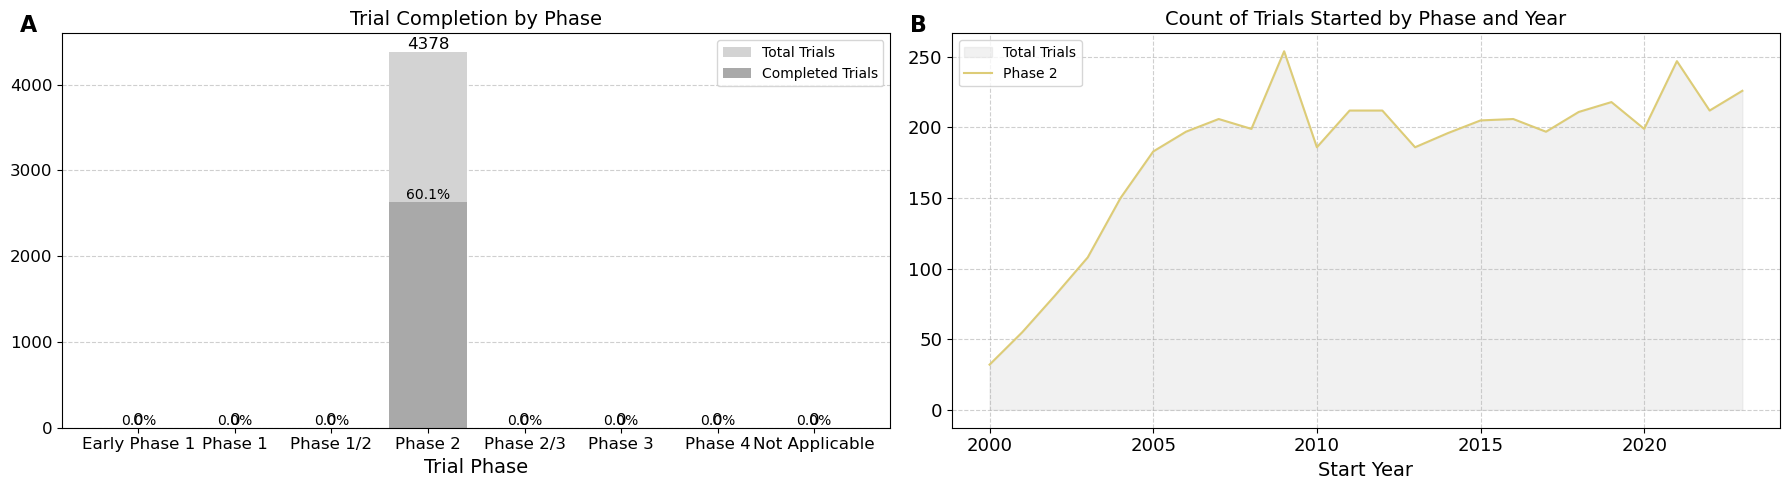

In [43]:
aact_viz.viz_phase_year_growth(general_metadata, f"{viz_path}/trials_phase_and_over_time{suffix}.pdf")

/Users/sdoneva/Documents/Work/In Progress/PhD/PhD Projects/In Progress/NeuroTrialAnalysis/src/aact_viz.py:141: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/Users/sdoneva/Documents/Work/In Progress/PhD/PhD Projects/In Progress/NeuroTrialAnalysis/src/aact_viz.py:148: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


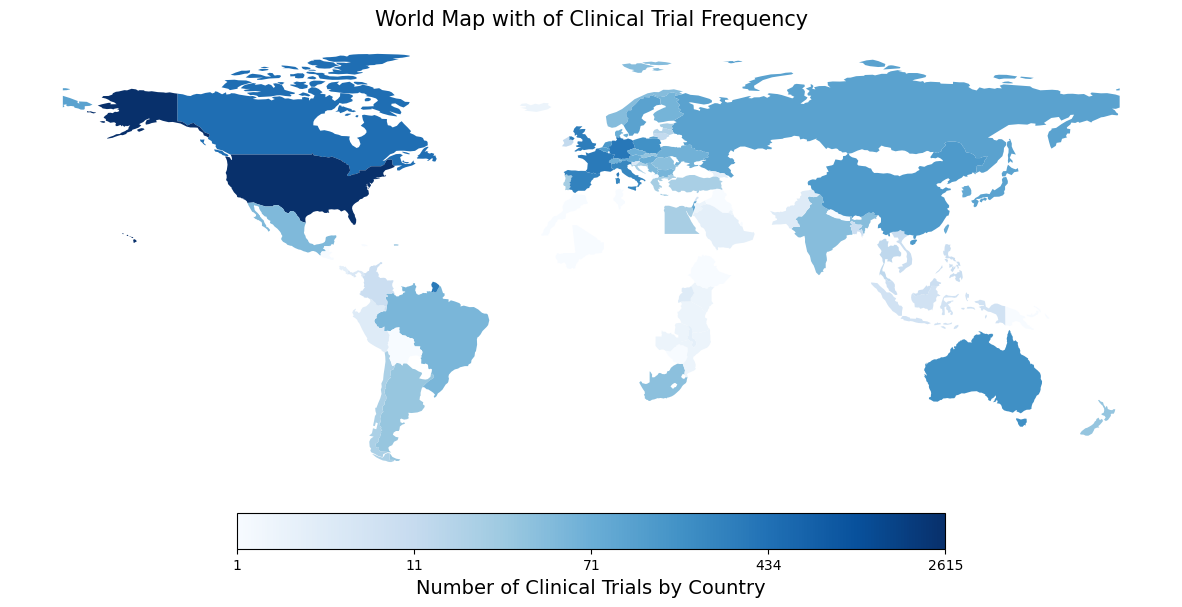

In [45]:
aact_viz.viz_countries_world_map(trial_design_metadata, f"{viz_path}/trials_world_map{suffix}.pdf")

/Users/sdoneva/Documents/Work/In Progress/PhD/PhD Projects/In Progress/NeuroTrialAnalysis/src/aact_viz.py:239: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_yticklabels(['{:.0f}%'.format(x * 100) for x in axs[1].get_yticks()])


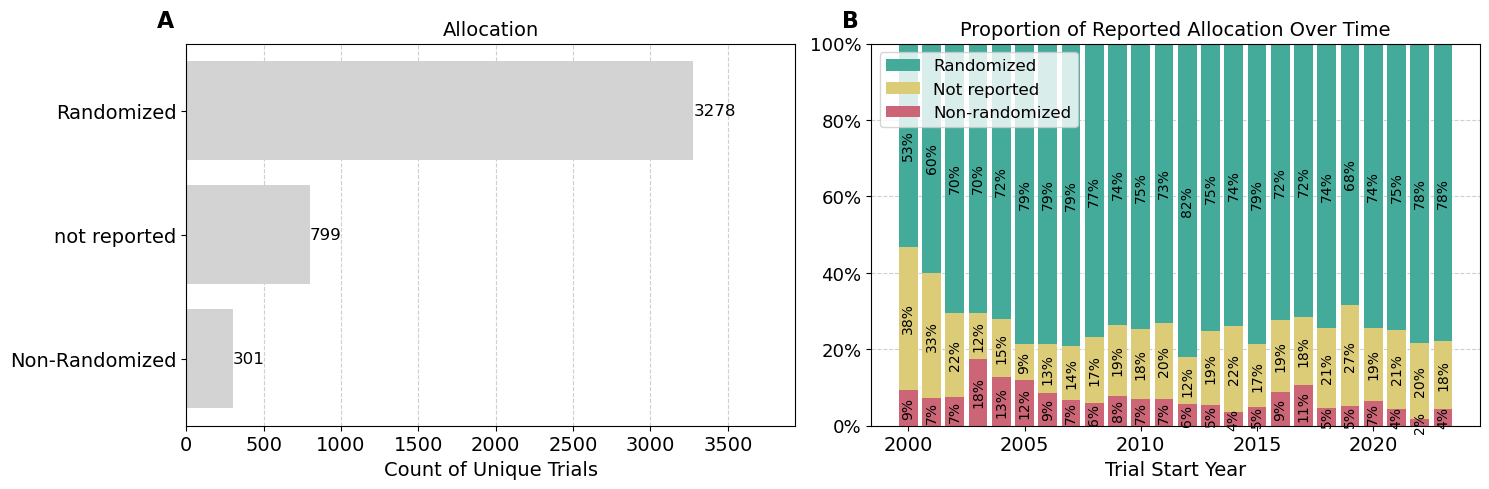

In [47]:
aact_viz.viz_allocation(trial_design_metadata, f"{viz_path}/design_allocation_over_time{suffix}.pdf")

/Users/sdoneva/Documents/Work/In Progress/PhD/PhD Projects/In Progress/NeuroTrialAnalysis/src/aact_viz.py:321: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_yticklabels(['{:.0f}%'.format(x * 100) for x in axs[1].get_yticks()])


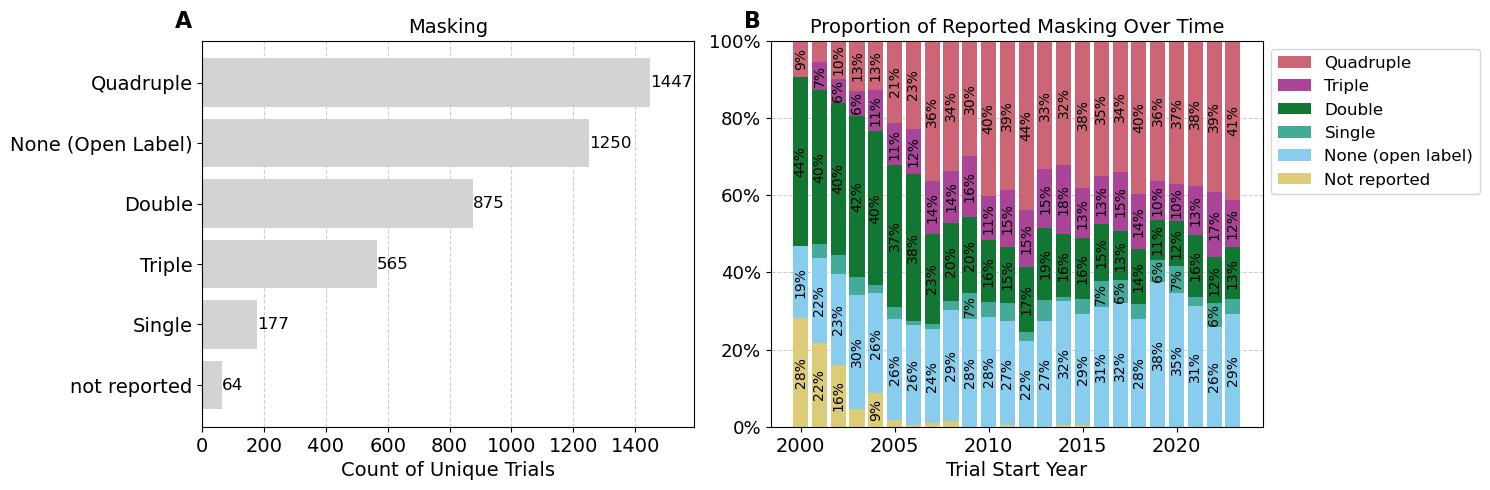

In [49]:
aact_viz.viz_masking(trial_design_metadata, f"{viz_path}/design_masking_over_time{suffix}.pdf")

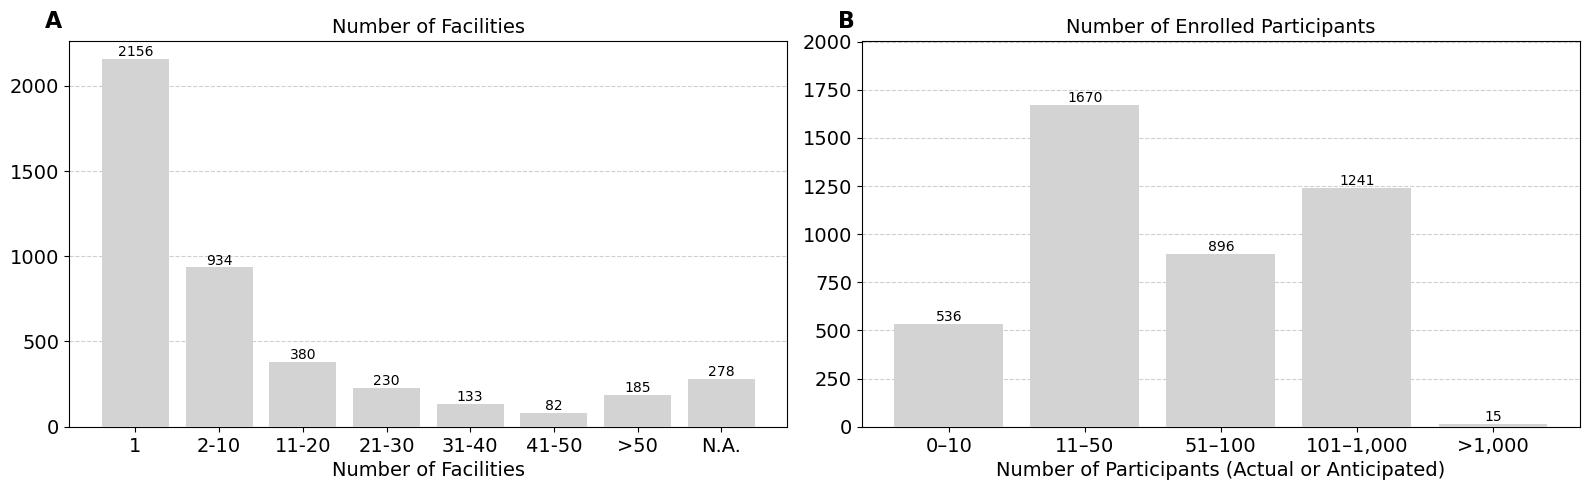

In [51]:
aact_viz.viz_facilities_enrollment(trial_design_metadata, trial_enrollment_metadata, f"{viz_path}/design_trial_size_facilities_enrollment{suffix}.pdf")


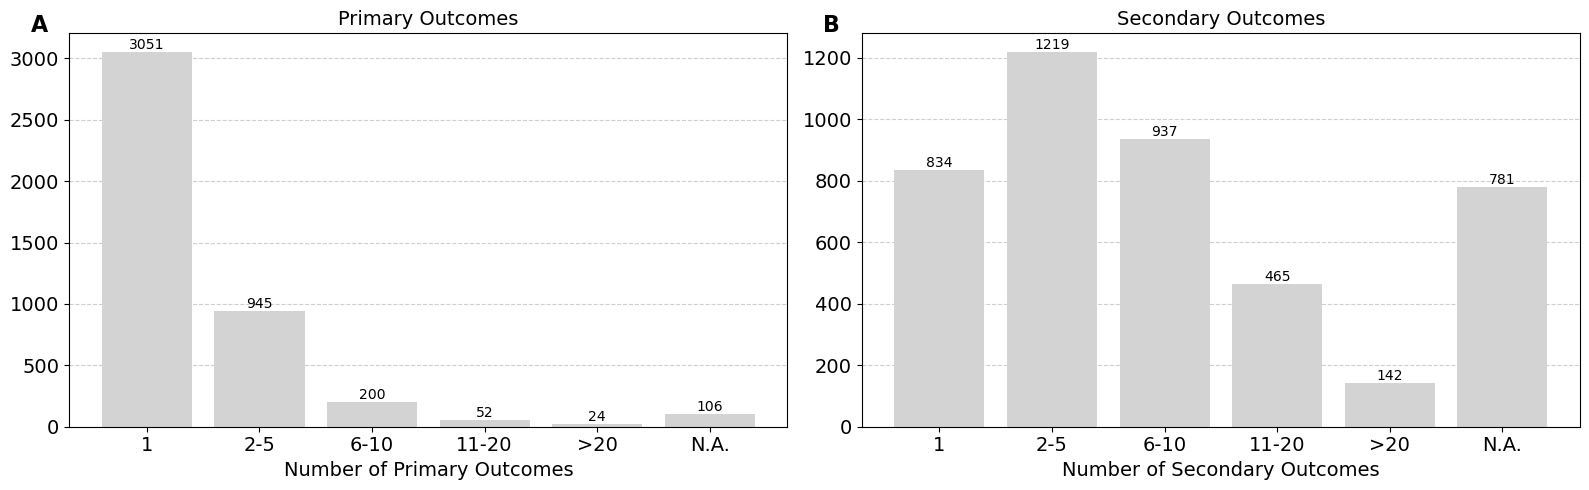

In [53]:
aact_viz.viz_outcomes(trial_design_metadata, f"{viz_path}/design_outcomes_primary_secondary_number_frequency{suffix}.pdf")

/Users/sdoneva/Documents/Work/In Progress/PhD/PhD Projects/In Progress/NeuroTrialAnalysis/src/aact_viz.py:495: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(['{:.0f}%'.format(x * 100) for x in ax1.get_yticks()])


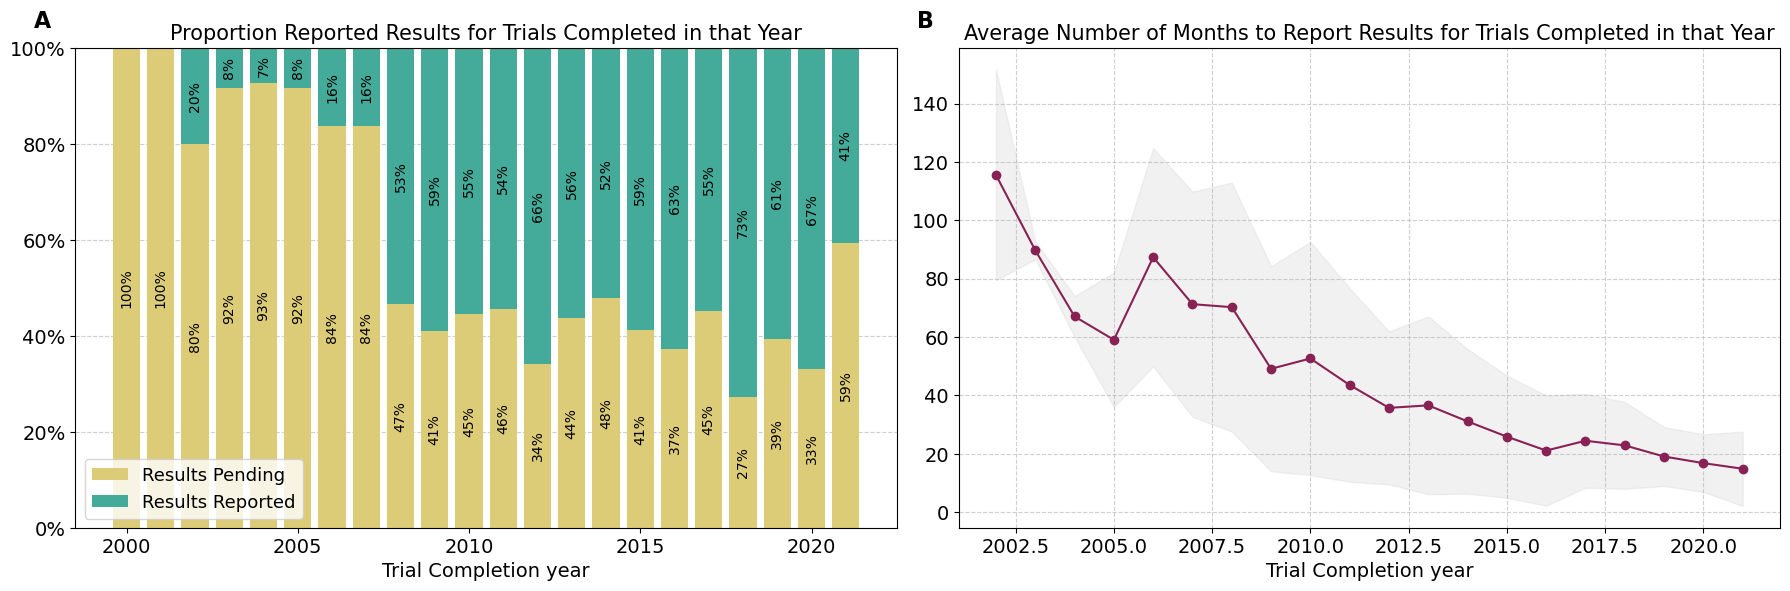

In [55]:
aact_viz.viz_results_reporting(trial_results_reporting_metadata, f"{viz_path}/completed_trials_results_reporting{suffix}.pdf")

/Users/sdoneva/Documents/Work/In Progress/PhD/PhD Projects/In Progress/NeuroTrialAnalysis/src/aact_viz.py:518: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['start_year'] = df_filtered['start_year'].astype(int)


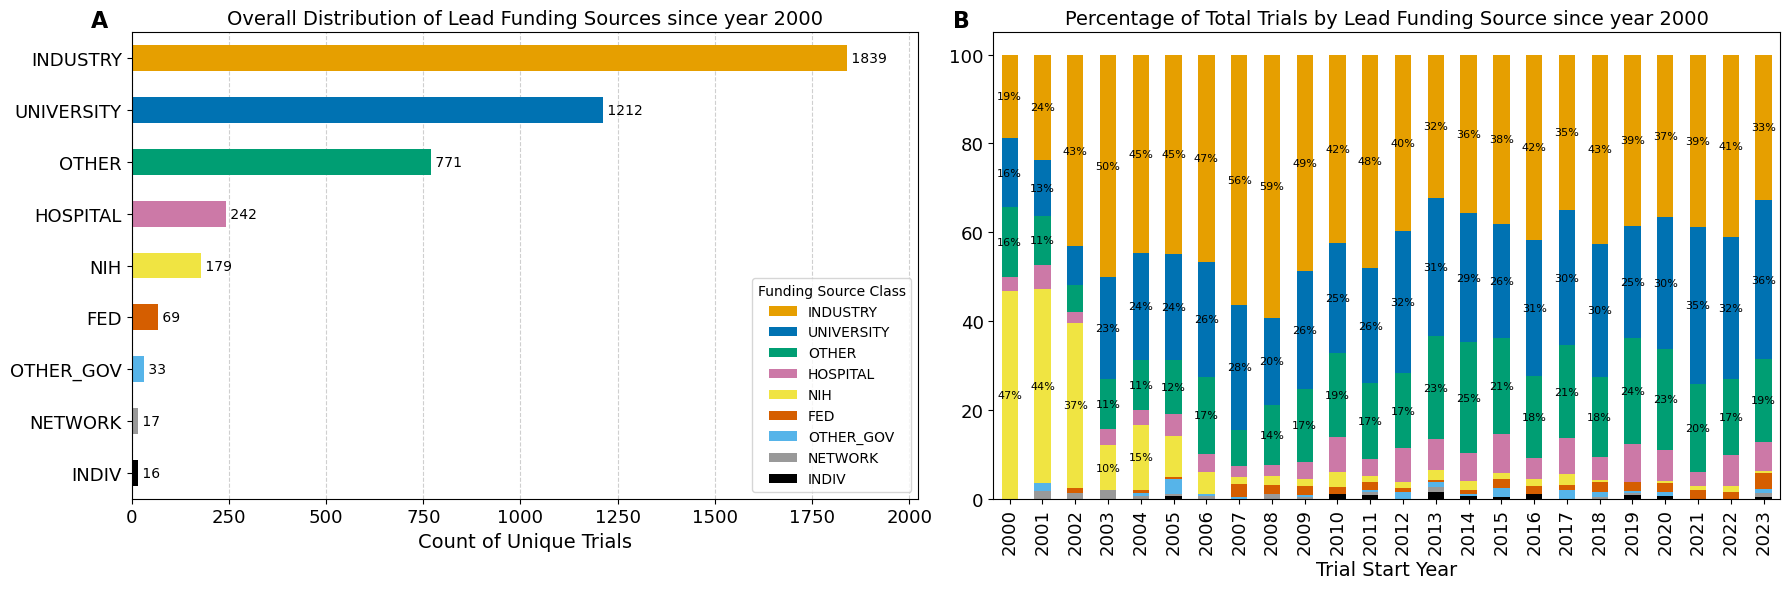

In [59]:
aact_viz.viz_sponsorship_lead(trial_sponsorship_metadata,  f"{viz_path}/lead_funding_agency{suffix}.pdf")

# Phase 3

In [61]:
suffix = '_phase3'
viz_path = 'viz/phase3_trials'

general_metadata = pd.read_csv(f"{data_out_path}general_metadata{suffix}.csv")
trial_design_metadata = pd.read_csv(f"{data_out_path}trial_design_metadata{suffix}.csv")
trial_enrollment_metadata = pd.read_csv(f"{data_out_path}trial_enrollment_metadata{suffix}.csv")
trial_results_reporting_metadata = pd.read_csv(f"{data_out_path}trial_results_reporting_metadata{suffix}.csv")
trial_sponsorship_metadata = pd.read_csv(f"{data_out_path}trial_sponsorship_metadata{suffix}.csv")

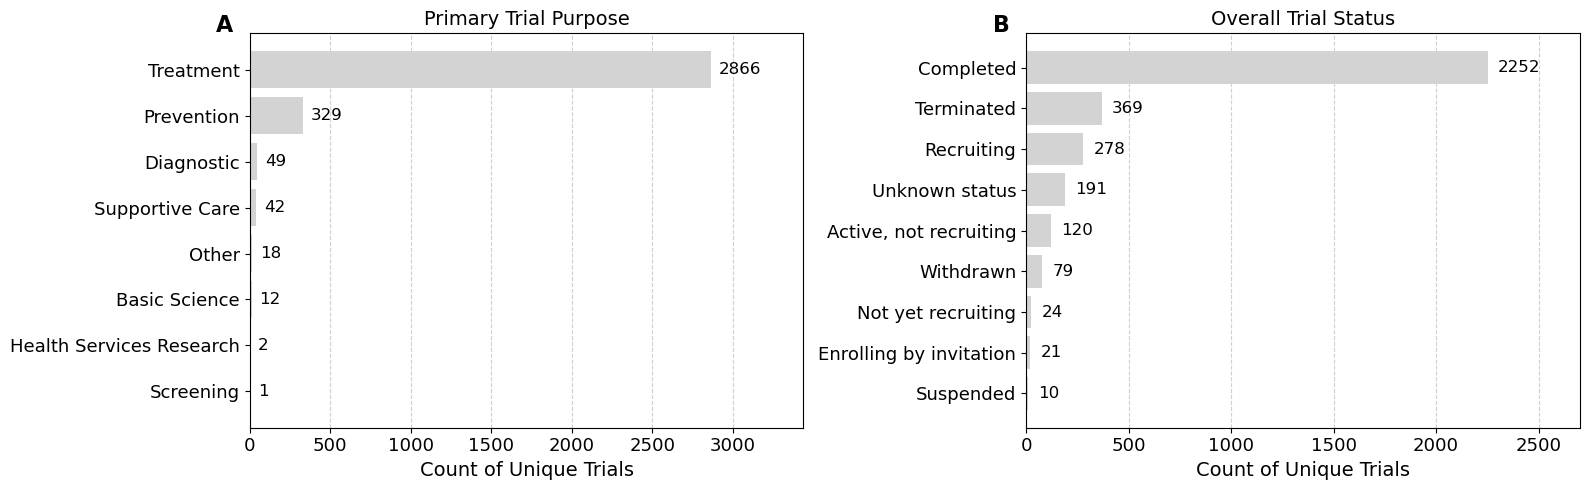

In [63]:
aact_viz.viz_purpose_status(general_metadata, f"{viz_path}/trials_purpose_and_status{suffix}.pdf")

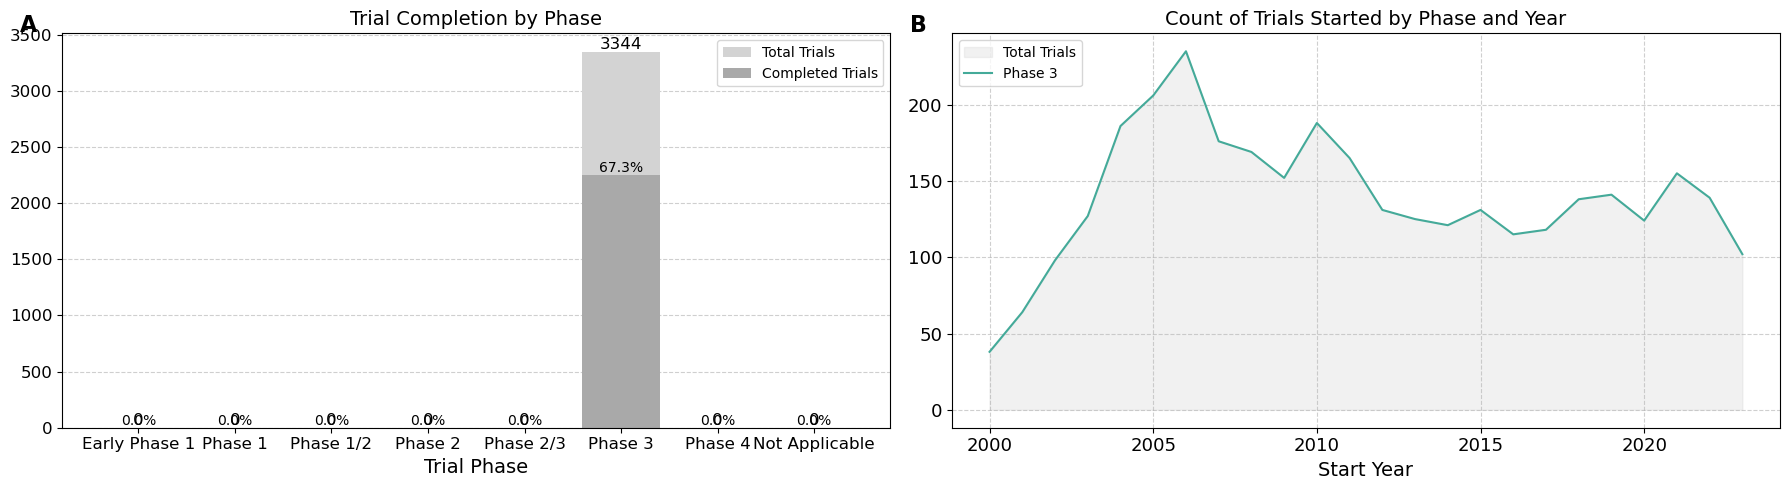

In [65]:
aact_viz.viz_phase_year_growth(general_metadata, f"{viz_path}/trials_phase_and_over_time{suffix}.pdf")

/Users/sdoneva/Documents/Work/In Progress/PhD/PhD Projects/In Progress/NeuroTrialAnalysis/src/aact_viz.py:141: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/Users/sdoneva/Documents/Work/In Progress/PhD/PhD Projects/In Progress/NeuroTrialAnalysis/src/aact_viz.py:148: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


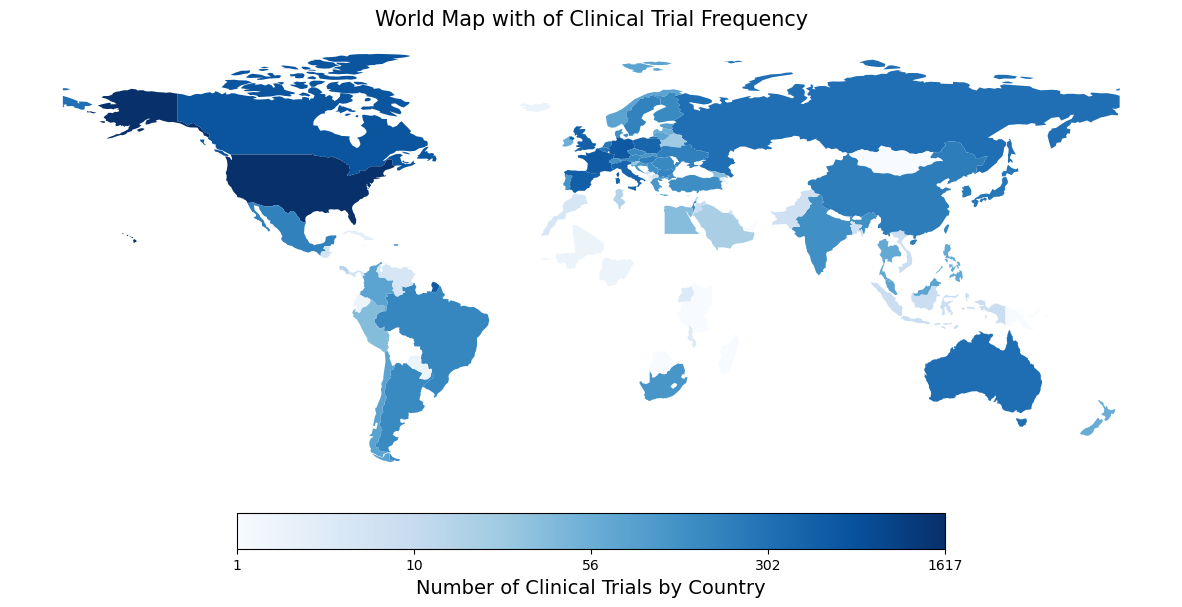

In [67]:
aact_viz.viz_countries_world_map(trial_design_metadata, f"{viz_path}/trials_world_map{suffix}.pdf")

/Users/sdoneva/Documents/Work/In Progress/PhD/PhD Projects/In Progress/NeuroTrialAnalysis/src/aact_viz.py:239: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_yticklabels(['{:.0f}%'.format(x * 100) for x in axs[1].get_yticks()])


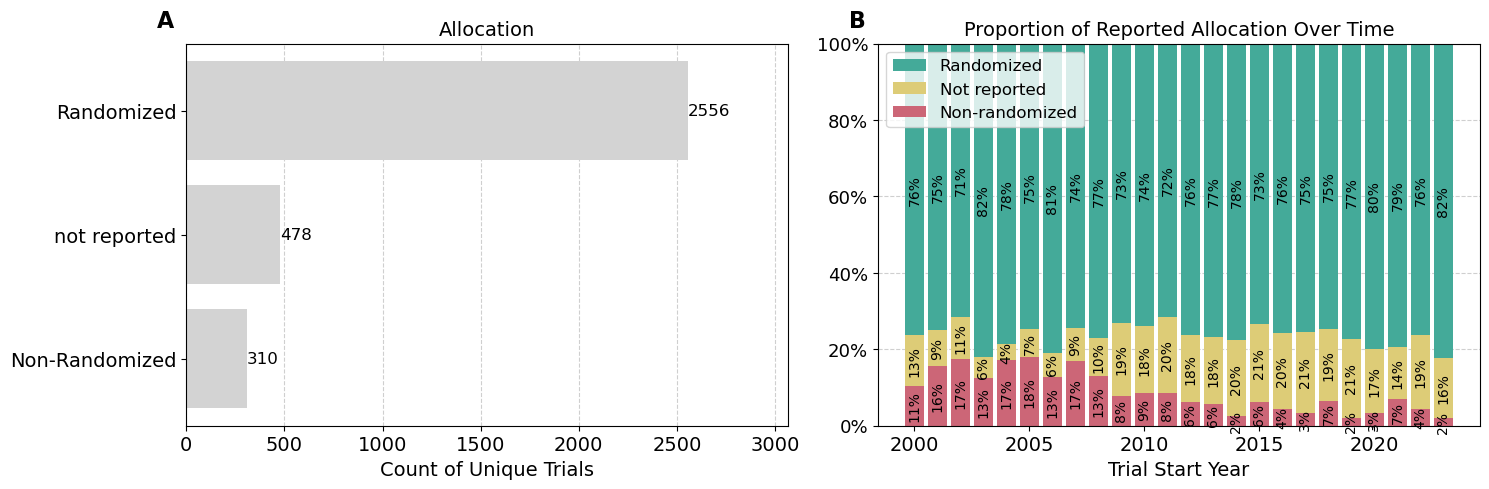

In [69]:
aact_viz.viz_allocation(trial_design_metadata, f"{viz_path}/design_allocation_over_time{suffix}.pdf")

/Users/sdoneva/Documents/Work/In Progress/PhD/PhD Projects/In Progress/NeuroTrialAnalysis/src/aact_viz.py:321: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_yticklabels(['{:.0f}%'.format(x * 100) for x in axs[1].get_yticks()])


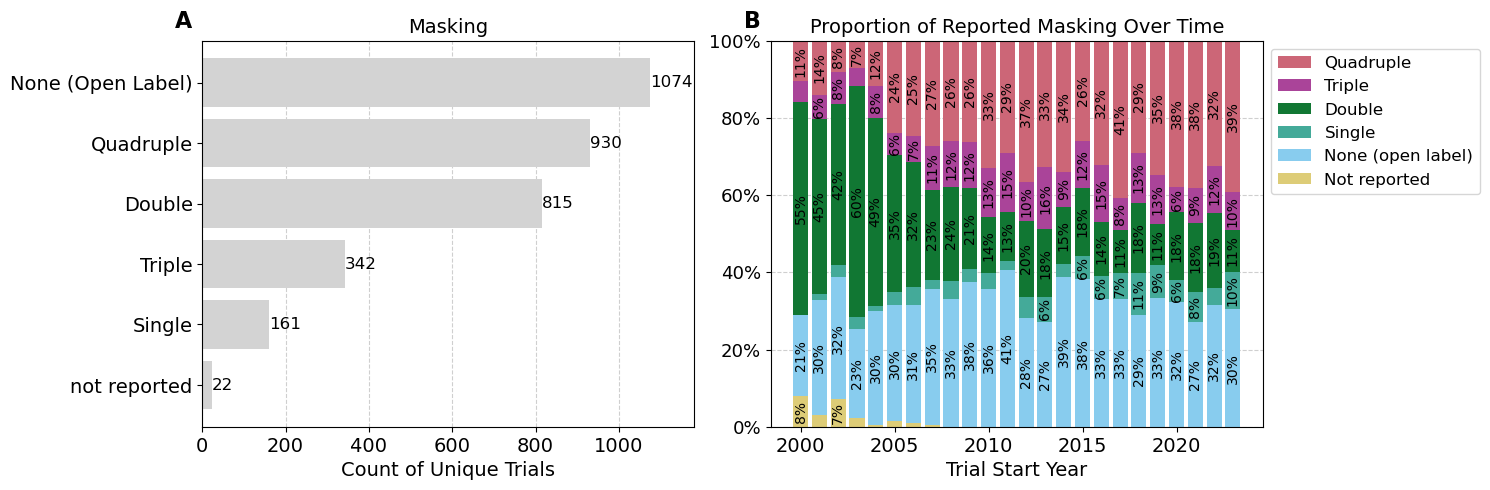

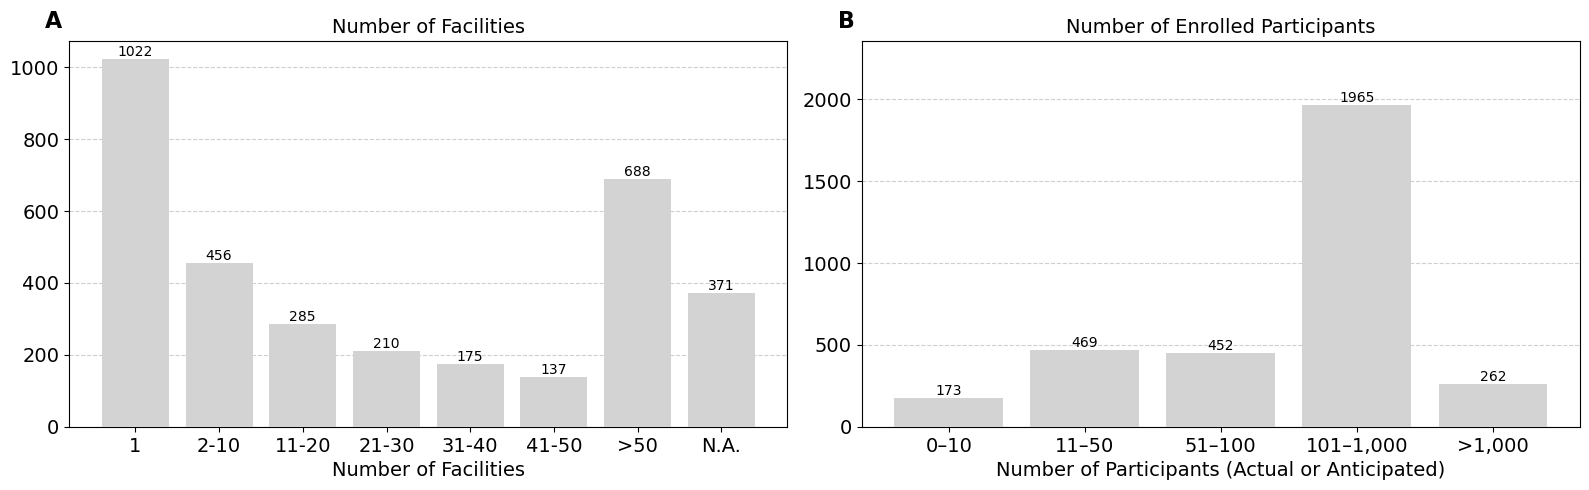

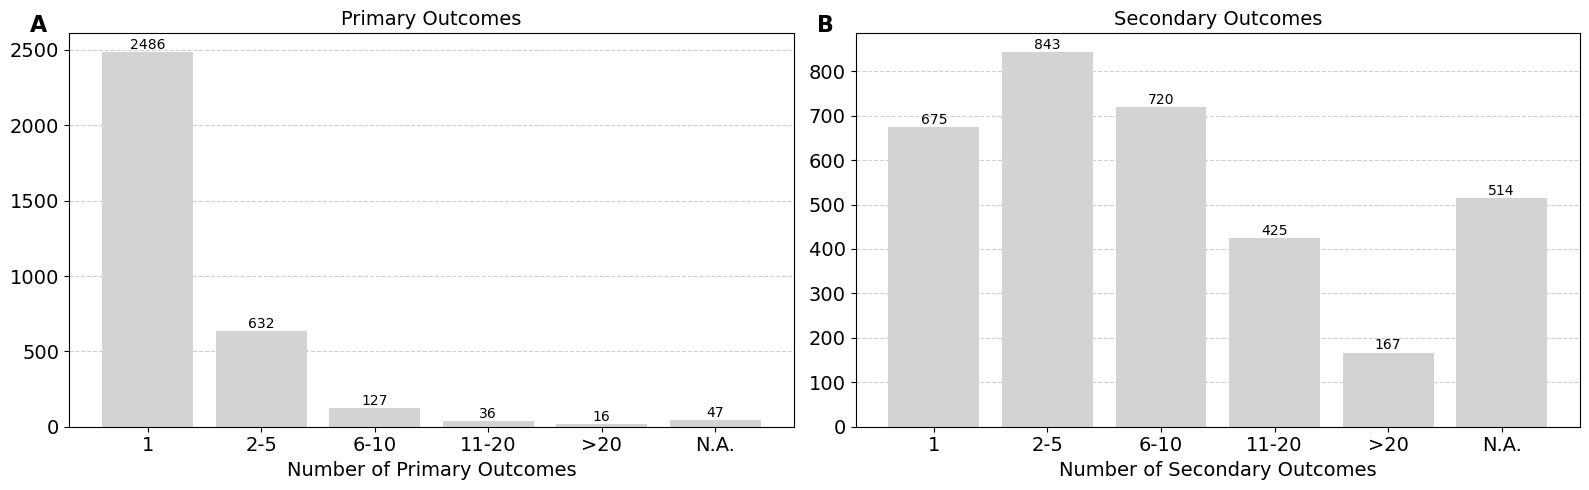

In [71]:
aact_viz.viz_masking(trial_design_metadata, f"{viz_path}/design_masking_over_time{suffix}.pdf")
aact_viz.viz_facilities_enrollment(trial_design_metadata, trial_enrollment_metadata, f"{viz_path}/design_trial_size_facilities_enrollment{suffix}.pdf")
aact_viz.viz_outcomes(trial_design_metadata, f"{viz_path}/design_outcomes_primary_secondary_number_frequency{suffix}.pdf")

/Users/sdoneva/Documents/Work/In Progress/PhD/PhD Projects/In Progress/NeuroTrialAnalysis/src/aact_viz.py:495: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(['{:.0f}%'.format(x * 100) for x in ax1.get_yticks()])
/Users/sdoneva/Documents/Work/In Progress/PhD/PhD Projects/In Progress/NeuroTrialAnalysis/src/aact_viz.py:518: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['start_year'] = df_filtered['start_year'].astype(int)


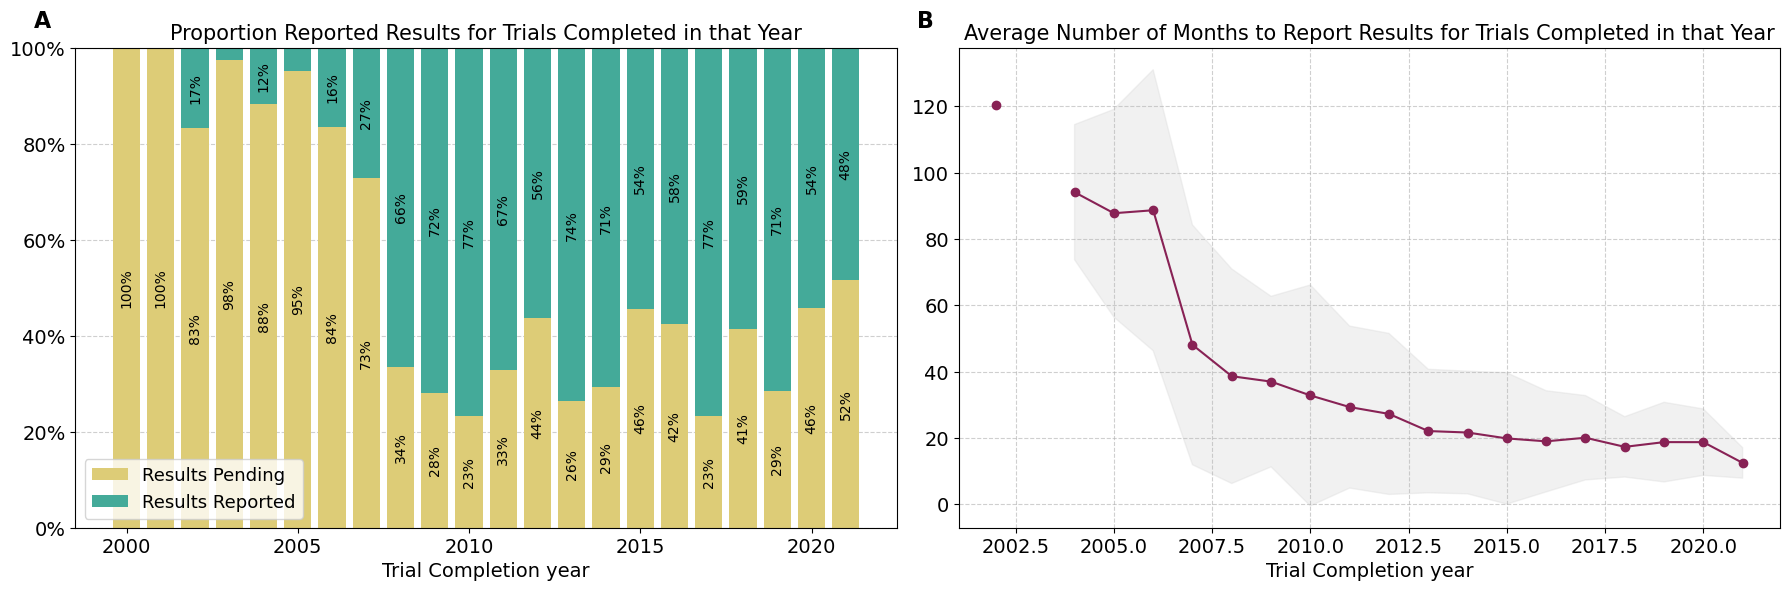

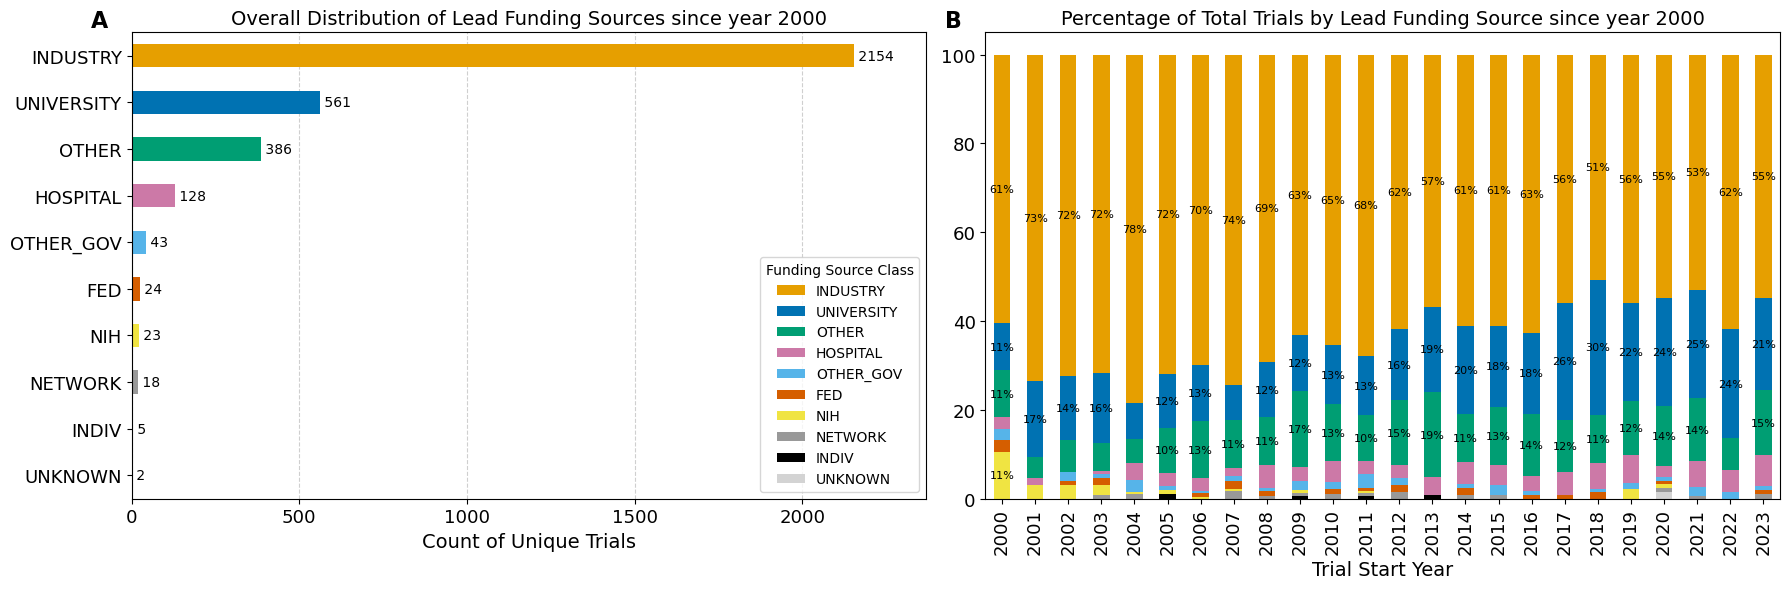

In [73]:
aact_viz.viz_results_reporting(trial_results_reporting_metadata, f"{viz_path}/completed_trials_results_reporting{suffix}.pdf")
aact_viz.viz_sponsorship_lead(trial_sponsorship_metadata,  f"{viz_path}/lead_funding_agency{suffix}.pdf")